# Preguntas Sin Pauta

- ¿Como obtenemos g(t)?
- ¿Cual es la estructura polinomial?
- QR incremental 
- ODE periodica [AYUDANTIA ANTERIOR]
- Soluciona no nulas [AYUDANTIA ANTERIOR] 
- IVP integro-diferencial 
 
 


# ¿Cómo Obtenemos g(t)?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_system(g0, g1, xf, N):
    h = xf / N
    t = np.linspace(0, xf, N+1)

    y1 = np.zeros(N+1)  # g(t)
    y2 = np.zeros(N+1)  # g'(t)

    # condiciones iniciales
    y1[0] = g0
    y2[0] = g1


    for i in range(N):
        y1[i+1] = y1[i] + h * y2[i]
        y2[i+1] = y2[i] + h * (-2 * y1[i] - 2 * y2[i])
    return t, y1

In [3]:
def trapezoidal_integration(t, y1):
    f = y1 * np.exp(-t**2)
    h = t[1] - t[0]
    return (h / 2) * (f[0] + 2 * np.sum(f[1:-1]) + f[-1])

Integral aproximada f(100) = 0.221007


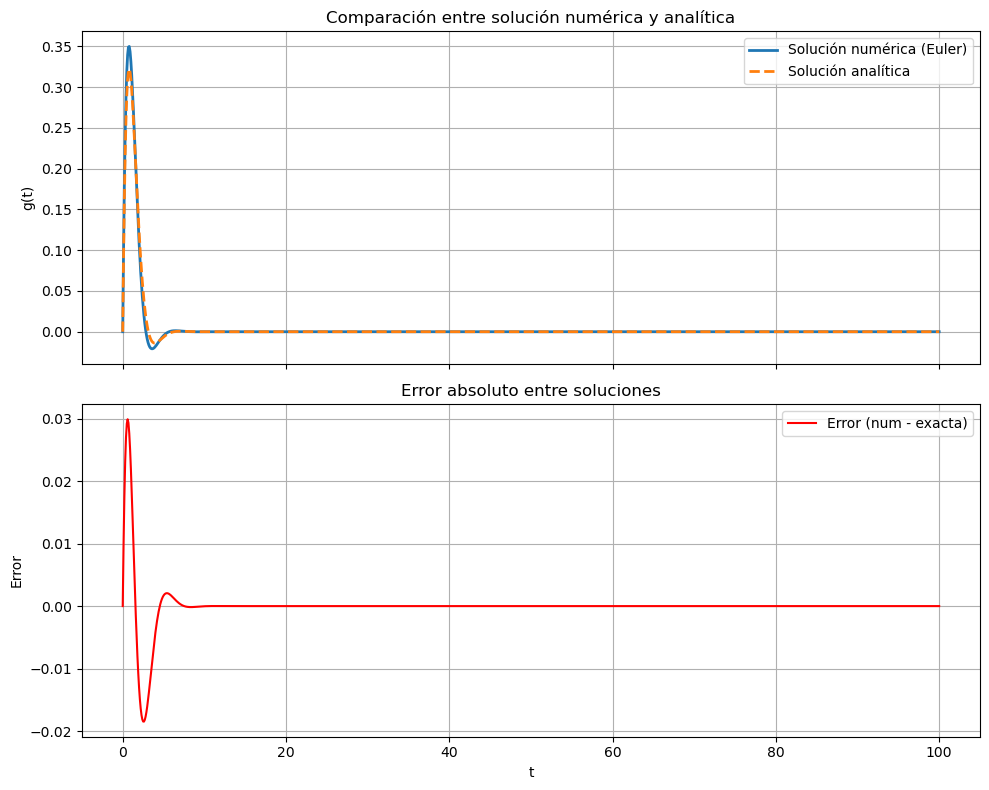

In [ ]:
x_final = 100
N = 1000

# g(t) con euler
t_vals, g_num = euler_system(g0=0, g1=1, xf=x_final, N=N)

# f(x) 
f_x = trapezoidal_integration(t_vals, g_num)
print(f"Integral aproximada f({x_final}) = {f_x:.6f}")

# solución analítica
g_exact = np.exp(-t_vals) * np.sin(t_vals)

# plotear
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Solución
axs[0].plot(t_vals, g_num, label="Solución numérica (Euler)", lw=2)
axs[0].plot(t_vals, g_exact, '--', label="Solución analítica", lw=2)
axs[0].set_ylabel("g(t)")
axs[0].set_title("Comparación entre solución numérica y analítica")
axs[0].legend()
axs[0].grid(True)

# Error
error = g_num - g_exact
axs[1].plot(t_vals, error, color='red', label="Error (num - exacta)")
axs[1].set_xlabel("t")
axs[1].set_ylabel("Error")
axs[1].set_title("Error absoluto entre soluciones")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

---

# IVP Integro-diferencial

$$
\begin{align*}
\dot{y}(t) &= sin(y(t)) - \int_{0}^{t} y(s) ds, \quad t \in 0,10\\
\ddot{y}(t) &= cos(y(t)) \dot{y(t)} - y(t) \\
y(0)&=1 \\
\dot{y(10)} &= 0.1
\end{align*}
$$


In [8]:
def solve_bvp_euler(alpha, t_final=10, N=1000):
    h = t_final / N
    t_vals = np.linspace(0, t_final, N+1)

    y1 = np.zeros(N+1)  # y(t)
    y2 = np.zeros(N+1)  # y'(t)

    # Condiciones iniciales
    y1[0] = 1.0
    y2[0] = alpha

    for i in range(N):
        y1[i+1] = y1[i] + h * y2[i]
        y2[i+1] = y2[i] + h * (np.cos(y1[i]) * y2[i] - y1[i])

    # Calculamos el error en el valor de frontera deseado
    error = y2[10] - 0.1  # y'(10) - 0.1

    return t_vals, y1, error

In [11]:
def shooting_method_bisection(solve_ivp_func, alpha_min, alpha_max, tol=1e-6, t_final=10, N=1000):
    # Evaluamos los errores iniciales
    _, _, err_min = solve_ivp_func(alpha_min, t_final, N)
    _, _, err_max = solve_ivp_func(alpha_max, t_final, N)

    if err_min * err_max > 0:
        raise ValueError("El intervalo no encierra una raíz (misma señal en los extremos). \n error_min: {}, error_max: {}".format(err_min, err_max))

    while abs((alpha_max - alpha_min)/2) > tol:
        alpha_mid = 0.5 * (alpha_min + alpha_max)
        _, _, err_mid = solve_ivp_func(alpha_mid, t_final, N)

        if err_mid * err_min < 0:
            alpha_max = alpha_mid
            err_max = err_mid
        else:
            alpha_min = alpha_mid
            err_min = err_mid

    # Usamos el mejor alpha para calcular y1
    alpha_star = 0.5 * (alpha_min + alpha_max)
    t_vals, y1_vals, _ = solve_ivp_func(alpha_star, t_final, N)

    return t_vals, y1_vals, alpha_star

Alpha óptimo encontrado: 0.19265831


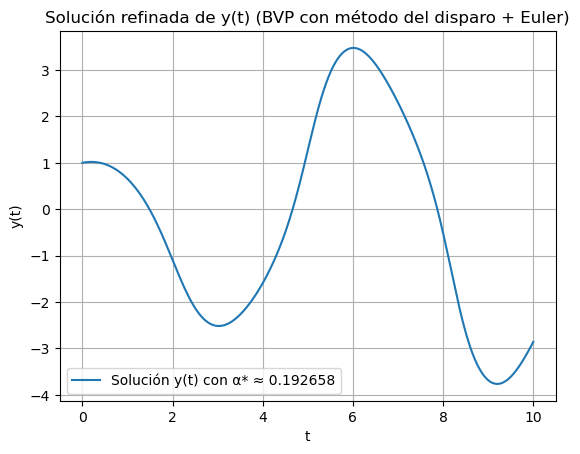

In [ ]:
def solve_with_refinement(alpha_min=0.0, alpha_max=10.0, tol=1e-6, N_coarse=1000, N_fine=5000, t_final=10):
    # Disparo con resolución baja para encontrar alpha*
    _, _, alpha_star = shooting_method_bisection(
        solve_bvp_euler, alpha_min, alpha_max, tol, t_final, N_coarse
    )

    # Resolver con mayor resolución usando alpha*
    t_fine, y1_fine, _ = solve_bvp_euler(alpha_star, t_final, N_fine)

    return t_fine, y1_fine, alpha_star

# ---------- Ejecutar todo ----------
t_vals, y1_vals, alpha_star = solve_with_refinement()

print(f"Alpha óptimo encontrado: {alpha_star:.8f}")

# ---------- Graficar resultado refinado ----------
plt.plot(t_vals, y1_vals, label=f'Solución y(t) con α* ≈ {alpha_star:.6f}')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solución refinada de y(t) (BVP con método del disparo + Euler)")
plt.grid(True)
plt.legend()
plt.show()

